In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('tham_luang_rescue_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
df.drop(columns=['id'],inplace=True)
df.info()
print(df.isna().sum())
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        5000 non-null   datetime64[ns]
 1   mission_type     5000 non-null   object        
 2   team_size        5000 non-null   int64         
 3   water_level      4750 non-null   float64       
 4   depth            4371 non-null   float64       
 5   oxygen_level     4498 non-null   float64       
 6   temperature      4381 non-null   float64       
 7   victim_status    5000 non-null   object        
 8   victim_count     5000 non-null   int64         
 9   mission_success  5000 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 390.8+ KB
timestamp            0
mission_type         0
team_size            0
water_level        250
depth              629
oxygen_level       502
temperature        619
victim_status

,timestamp,mission_type,team_size,water_level,depth,oxygen_level,temperature,victim_status,victim_count,mission_success
0,2018-07-03 00:06:54.802960640,medical,5,9.191810,4.362105,16.717150,27.871266,critical,8,1
1,2018-07-02 00:21:53.542708736,rescue,4,10.122547,5.184041,9.949614,27.585167,stable,7,0
2,2018-06-25 06:45:52.390477824,exploration,2,13.265970,6.700720,22.294991,27.177927,stable,2,0
3,2018-06-30 22:24:39.175835136,rescue,10,11.141887,5.722605,15.725127,30.659910,critical,6,0
4,2018-06-28 13:02:04.584916992,exploration,10,12.147761,5.789450,4.073761,NaN,stable,4,0
5,2018-07-08 03:50:44.048809728,rescue,3,6.028111,3.086449,26.459762,27.682597,stable,12,1
6,2018-07-05 09:09:54.118823680,medical,5,8.282520,4.420568,22.257815,25.302986,stable,10,0
7,2018-06-30 16:56:33.318663936,exploration,9,12.145423,5.665862,24.314932,28.904499,stable,6,0
8,2018-07-09 10:17:18.447689472,rescue,3,6.001525,3.314556,12.621470,NaN,stable,13,1
9,2018-07-08 22:12:33.270654208,rescue,9,6.231229,3.377714,24.926631,24.962621,stable,12,1


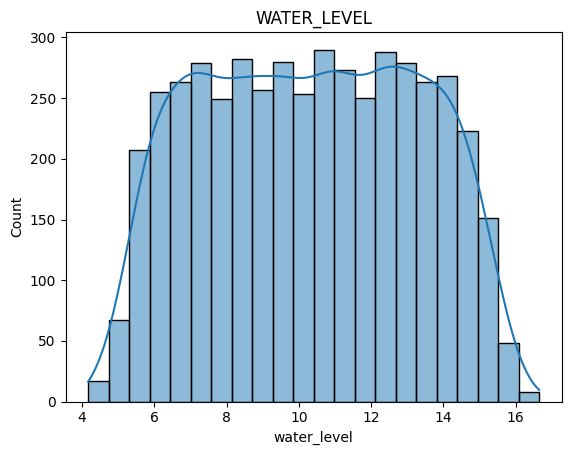

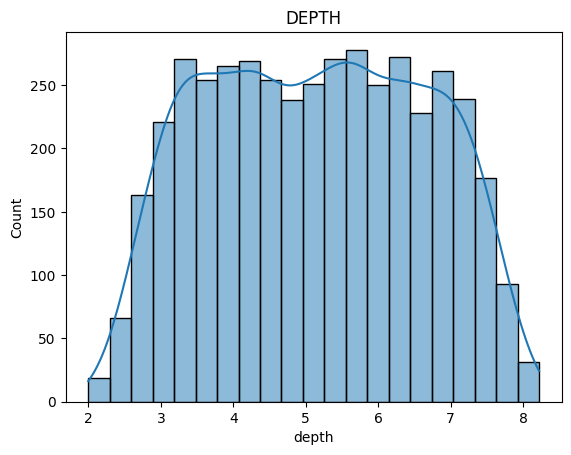

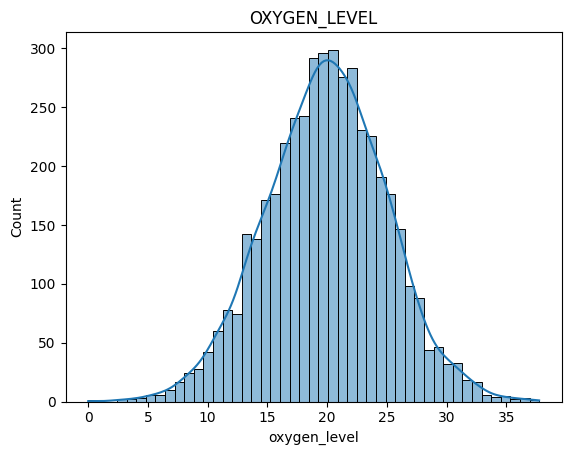

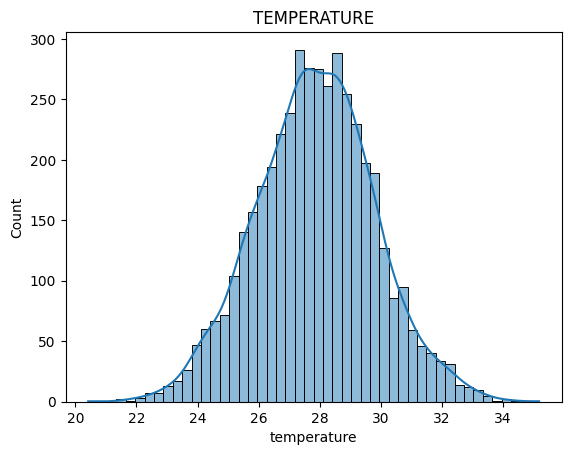

In [ ]:
missing_columns = df.isna().sum().to_frame().loc[lambda x: x[0]>0].index.to_list()
# print(missing_columns)

for col in missing_columns:
  sns.histplot(df[col],kde=True)
  plt.title(col.upper())
  plt.show()

In [ ]:
import numpy as np

def hight_light_var(ax_,variable_index):
  for i in range(len(df_number.columns)):
    for j in range(len(df_number.columns)):
      if i != j:
        if i == variable_index or j==variable_index:
          ax_[i,j].get_children()[0].set_color('red')

number_columns = list(df.select_dtypes(include=['float64','int64']).columns)
# print(number_columns)

df_number = df[number_columns].copy()

for col in number_columns:
  if df_number[col].isna().sum() > 0:
    df_number['miss'] = df_number[col].apply(lambda x: -1 if np.isnan(x) else x)
    ax = pd.plotting.scatter_matrix(df_number,diagonal='kde',figsize=(13,13))
    variable_index = df_number.columns.get_loc('miss')
    hight_light_var(ax,variable_index)
    plt.suptitle(col.upper(),y=0.9)

Output hidden; open in https://colab.research.google.com to view.

<Figure size 1200x500 with 0 Axes>

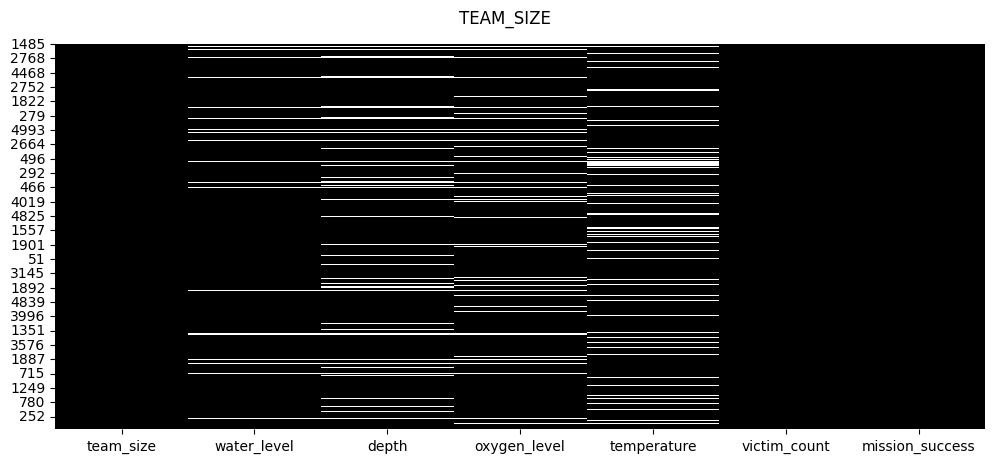

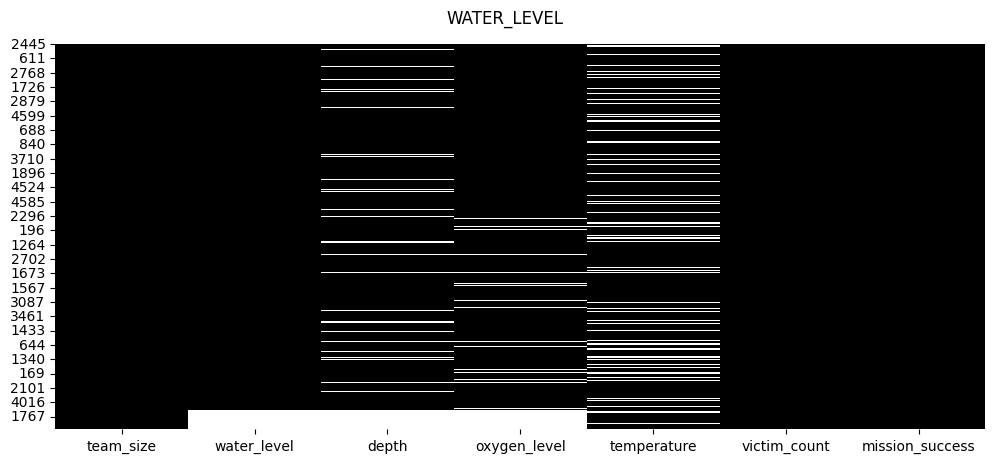

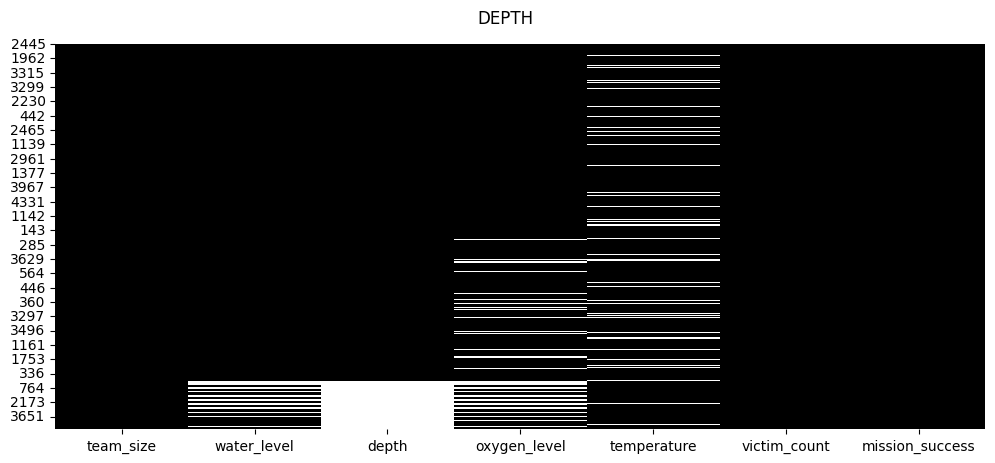

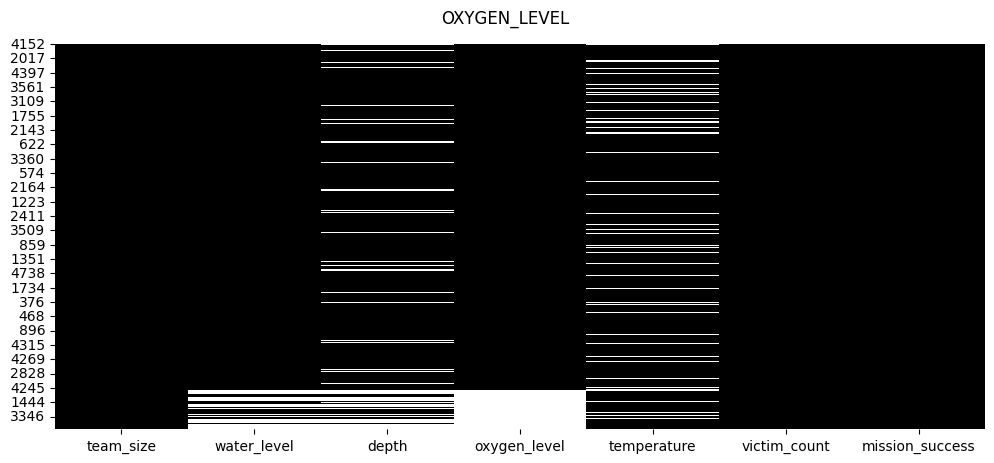

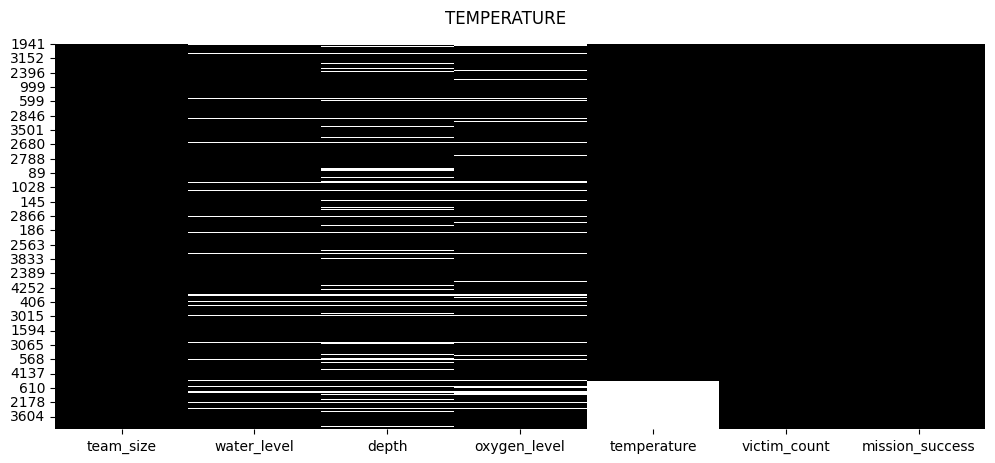

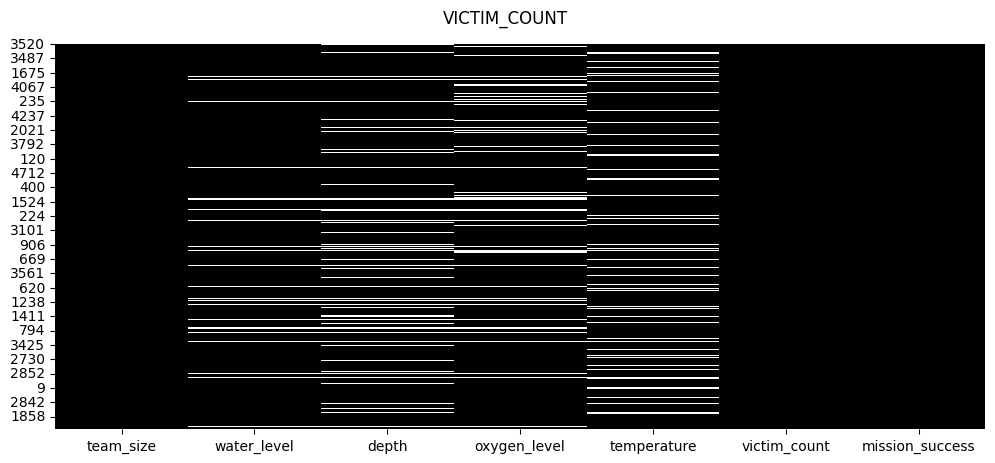

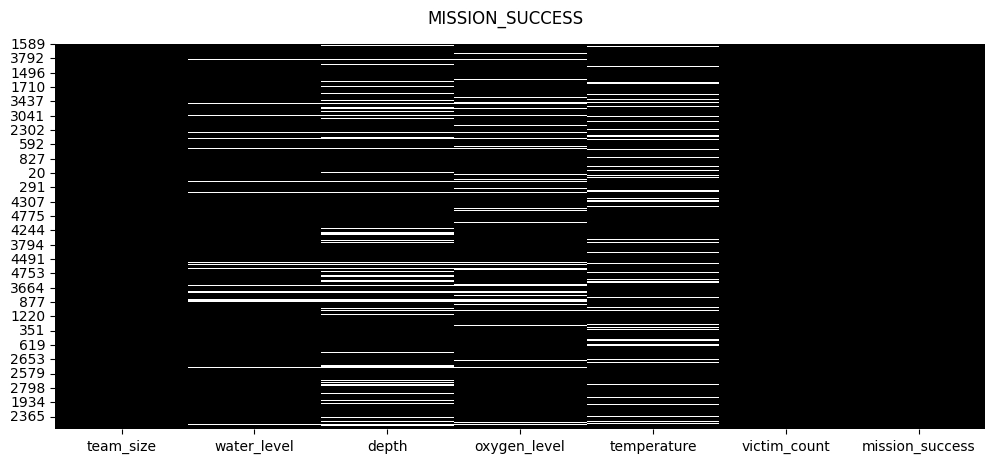

In [ ]:
number_columns = list(df.select_dtypes(include=['float64','int64']).columns)
# print(number_columns)

df_number = df[number_columns].copy()

plt.figure(figsize=(12,5))

for col in number_columns:
  plt.figure(figsize=(12,5))
  sns.heatmap(df_number.sort_values(by=[col]).isnull(),cbar=False,cmap='Greys_r')
  plt.suptitle(col.upper(),y=0.95)

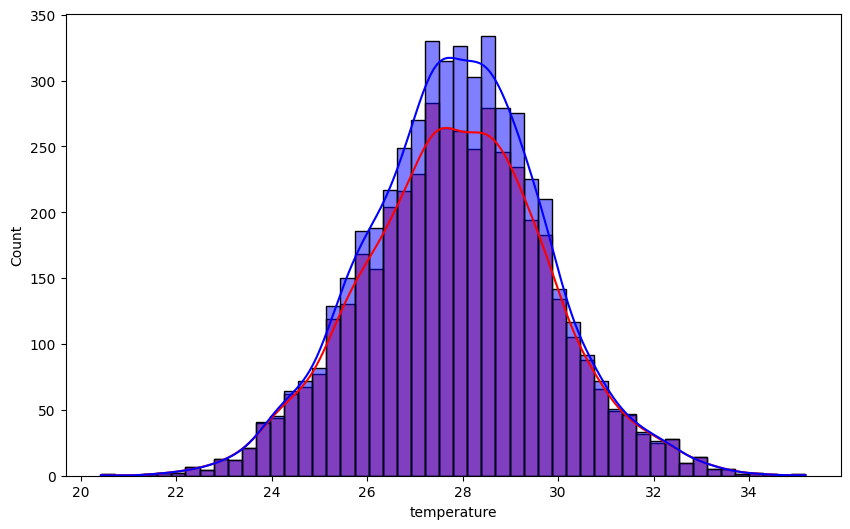

In [ ]:
df = pd.read_csv('tham_luang_rescue_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
df.drop(columns=['id'],inplace=True)

def forward_backward_mean_imputer(s):
  ffill = s.ffill()
  bfill = s.bfill()
  imputed = (ffill + bfill) / 2
  if pd.isna(imputed.iloc[0]):
    imputed.iloc[0] = bfill.iloc[0]
  if pd.isna(imputed.iloc[-1]):
    imputed.iloc[-1] = ffill.iloc[-1]
  return imputed

df.sort_values(by=['timestamp'],inplace=True)
df['temperature_imp'] = forward_backward_mean_imputer(df['temperature'])

fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['temperature'],kde=True,color='red',alpha=0.5,ax=ax,bins=50)
sns.histplot(df['temperature_imp'],kde=True,color='blue',alpha=0.5,ax=ax,bins=50)
plt.show()

##imputation for descriptive analysis##

(4138, 12)
             day_of_year  water_level
day_of_year     1.000000    -0.985211
water_level    -0.985211     1.000000


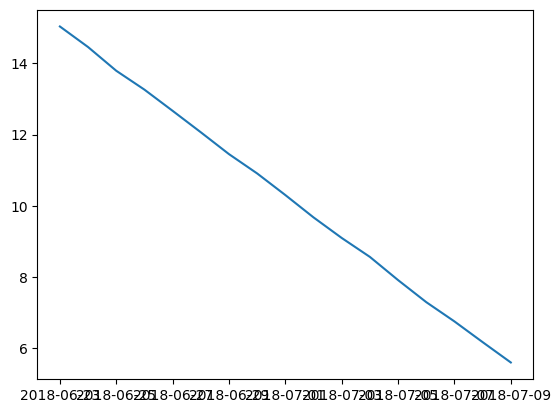

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


(5000, 10)
             day_of_year  water_level
day_of_year     1.000000    -0.984957
water_level    -0.984957     1.000000


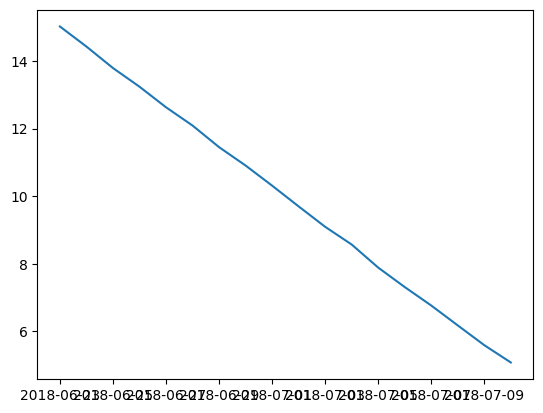

(5000, 10)
             day_of_year  water_level
day_of_year     1.000000    -0.985652
water_level    -0.985652     1.000000


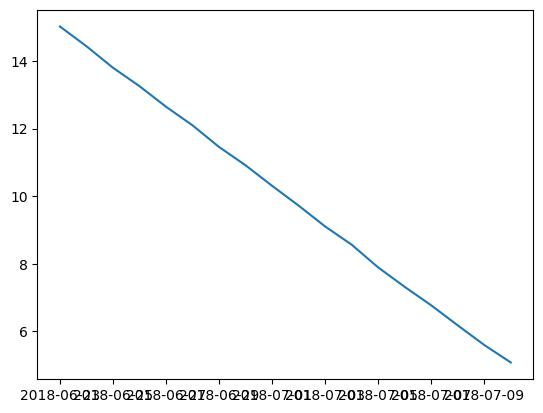

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv('tham_luang_rescue_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
df.drop(columns=['id'],inplace=True)

def forward_backward_mean_imputer(s):
  ffill = s.ffill()
  bfill = s.bfill()
  imputed = (ffill + bfill) / 2
  if pd.isna(imputed.iloc[0]):
    imputed.iloc[0] = bfill.iloc[0]
  if pd.isna(imputed.iloc[-1]):
    imputed.iloc[-1] = ffill.iloc[-1]
  return imputed

df.sort_values(by=['timestamp'],inplace=True)
df['temperature'] = forward_backward_mean_imputer(df['temperature'])
df.reset_index(drop=True,inplace=True)
# df.info()

# option 1: listwise deletion
df_baseline = df.dropna().copy()
df_baseline['date'] = df_baseline['timestamp'].dt.date
df_baseline['day_of_year'] = df_baseline['timestamp'].dt.dayofyear
daily_water_level = df_baseline.groupby('date')['water_level'].mean().reset_index()
print(df_baseline.shape)

print(df_baseline[['day_of_year','water_level']].corr())
plt.plot(daily_water_level['date'],daily_water_level['water_level'])
plt.show()

# option 2: iterativeimputer
imputer = IterativeImputer(random_state=55,estimator=DecisionTreeRegressor())
df_timestamp = df['timestamp']
df_imputed = df.drop(columns=['timestamp','mission_type','victim_status'])
df_imputed = pd.DataFrame(imputer.fit_transform(df_imputed),columns=df_imputed.columns)
df_imputed['timestamp'] = df_timestamp
df_imputed['date'] = df_imputed['timestamp'].dt.date
df_imputed['day_of_year'] = df_imputed['timestamp'].dt.dayofyear
daily_water_level = df_imputed.groupby('date')['water_level'].mean().reset_index()
print(df_imputed.shape)

print(df_imputed[['day_of_year','water_level']].corr())
plt.plot(daily_water_level['date'],daily_water_level['water_level'])
plt.show()

# option 3: KNN imputer
imputer = KNNImputer(n_neighbors=5)
df_timestamp = df['timestamp']
df_imputed = df.drop(columns=['timestamp','mission_type','victim_status'])
df_imputed = pd.DataFrame(imputer.fit_transform(df_imputed),columns=df_imputed.columns)
df_imputed['timestamp'] = df_timestamp
df_imputed['date'] = df_imputed['timestamp'].dt.date
df_imputed['day_of_year'] = df_imputed['timestamp'].dt.dayofyear
daily_water_level = df_imputed.groupby('date')['water_level'].mean().reset_index()
print(df_imputed.shape)

print(df_imputed[['day_of_year','water_level']].corr())
plt.plot(daily_water_level['date'],daily_water_level['water_level'])
plt.show()


##Imputation for Statistical Analysis##

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency, f_oneway
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('tham_luang_rescue_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
df.drop(columns=['id'],inplace=True)

def forward_backward_mean_imputer(s):
  ffill = s.ffill()
  bfill = s.bfill()
  imputed = (ffill + bfill) / 2
  if pd.isna(imputed.iloc[0]):
    imputed.iloc[0] = bfill.iloc[0]
  if pd.isna(imputed.iloc[-1]):
    imputed.iloc[-1] = ffill.iloc[-1]
  return imputed

df.sort_values(by=['timestamp'],inplace=True)
df['temperature'] = forward_backward_mean_imputer(df['temperature'])
df.reset_index(drop=True,inplace=True)

number_columns = list(df.select_dtypes(include=['float64','int64']).columns)
df_oxygen = df[number_columns].drop(columns=['water_level','depth'])
imputer = KNNImputer(n_neighbors=5)
df_oxygen = pd.DataFrame(imputer.fit_transform(df_oxygen),columns=df_oxygen.columns)
# df_oxygen.info()

# df_reg = df[['victim_count','depth','water_level']].dropna()
# X = df_reg[['victim_count','depth']]
# y = df_reg['water_level']
# model = LinearRegression()
# model.fit(X,y)
# r2 = model.score(X,y)
# print(r2)

# df_reg = df[['victim_count','depth','water_level']].dropna()
# X = df_reg[['victim_count','water_level']]
# y = df_reg['depth']
# model = LinearRegression()
# model.fit(X,y)
# r2 = model.score(X,y)
# print(r2)

df_water_depth = df[['victim_count','water_level','depth']].copy()
imputer = IterativeImputer(random_state=55,estimator=LinearRegression(),imputation_order='random',max_iter=100)
df_water_depth = pd.DataFrame(imputer.fit_transform(df_water_depth),columns=df_water_depth.columns)

df['oxygen_level'] = df_oxygen['oxygen_level']
df['water_level'] = df_water_depth['water_level']
df['depth'] = df_water_depth['depth']

# df.info()
# number_columns = list(df.select_dtypes(include=['float64','int64']).columns)
# df_number = df[number_columns].copy()
# ax = pd.plotting.scatter_matrix(df_number,diagonal='kde',figsize=(13,13))

success_water_level = df[df['mission_success'] == 1]['water_level']
failure_water_level = df[df['mission_success'] == 0]['water_level']
f_water,p_water = f_oneway(success_water_level,failure_water_level)
print(f'F={f_water:.5f}, p={p_water:.5f}')

success_depth = df[df['mission_success'] == 1]['depth']
failure_depth = df[df['mission_success'] == 0]['depth']
f_depth,p_depth = f_oneway(success_depth,failure_depth)
print(f'F={f_depth:.5f}, p={p_depth:.5f}')

success_temp = df[df['mission_success'] == 1]['temperature']
failure_temp = df[df['mission_success'] == 0]['temperature']
f_temp,p_temp = f_oneway(success_temp,failure_temp)
print(f'F={f_temp:.5f}, p={p_temp:.5f}')

X = df[['oxygen_level']]
y = df['mission_success']
logreg = LogisticRegression()
logreg.fit(X,y)
print(f'Coefficient={logreg.coef_[0][0]:.5f}')
print(f'Intercept={logreg.intercept_[0]:.5f}')
print(f'Score={logreg.score(X,y):.5f}')

F=744.96903, p=0.00000
F=739.54784, p=0.00000
F=0.91912, p=0.33775
Coefficient=0.00843
Intercept=0.11474
Score=0.57020


##Why customized imputation##

In [1]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency, f_oneway
from sklearn.linear_model import LogisticRegression
import pandas as pd

def forward_backward_mean_imputer(s):
  ffill = s.ffill()
  bfill = s.bfill()
  imputed = (ffill + bfill) / 2
  if pd.isna(imputed.iloc[0]):
    imputed.iloc[0] = bfill.iloc[0]
  if pd.isna(imputed.iloc[-1]):
    imputed.iloc[-1] = ffill.iloc[-1]
  return imputed

def statistical_testing(df):
  success_water_level = df[df['mission_success'] == 1]['water_level']
  failure_water_level = df[df['mission_success'] == 0]['water_level']
  f_water,p_water = f_oneway(success_water_level,failure_water_level)
  print(f'F={f_water:.5f}, p={p_water:.5f}')

  success_depth = df[df['mission_success'] == 1]['depth']
  failure_depth = df[df['mission_success'] == 0]['depth']
  f_depth,p_depth = f_oneway(success_depth,failure_depth)
  print(f'F={f_depth:.5f}, p={p_depth:.5f}')

  success_temp = df[df['mission_success'] == 1]['temperature']
  failure_temp = df[df['mission_success'] == 0]['temperature']
  f_temp,p_temp = f_oneway(success_temp,failure_temp)
  print(f'F={f_temp:.5f}, p={p_temp:.5f}')

  X = df[['oxygen_level']]
  y = df['mission_success']
  logreg = LogisticRegression()
  logreg.fit(X,y)
  print(f'Coefficient={logreg.coef_[0][0]:.5f}')
  print(f'Intercept={logreg.intercept_[0]:.5f}')
  print(f'Score={logreg.score(X,y):.5f}',end='\n\n')

df = pd.read_csv('tham_luang_rescue_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
df.drop(columns=['id'],inplace=True)
df.sort_values(by=['timestamp'],inplace=True)
df['temperature'] = forward_backward_mean_imputer(df['temperature'])
df.reset_index(drop=True,inplace=True)

# option 1: listwise deletion
df_baseline = df.dropna().copy()
print(f'Listwise Deletion')
statistical_testing(df_baseline)

# option 2: iterativeimputer
imputer = IterativeImputer(random_state=55,estimator=DecisionTreeRegressor(),imputation_order='random',max_iter=100)
df_imputed = df.drop(columns=['timestamp','mission_type','victim_status'])
df_imputed = pd.DataFrame(imputer.fit_transform(df_imputed),columns=df_imputed.columns)
print(f'IterativeImputer')
statistical_testing(df_imputed)

# option 3: KNN imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = df.drop(columns=['timestamp','mission_type','victim_status'])
df_imputed = pd.DataFrame(imputer.fit_transform(df_imputed),columns=df_imputed.columns)
print(f'IterativeImputer')
statistical_testing(df_imputed)


Listwise Deletion
F=641.41831, p=0.00000
F=635.91460, p=0.00000
F=1.90195, p=0.16793
Coefficient=0.00826
Intercept=0.13428
Score=0.57419



/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer
F=739.53867, p=0.00000
F=732.82793, p=0.00000
F=0.91912, p=0.33775
Coefficient=0.00951
Intercept=0.09293
Score=0.57020

IterativeImputer
F=743.35781, p=0.00000
F=741.56206, p=0.00000
F=0.91912, p=0.33775
Coefficient=0.00894
Intercept=0.10459
Score=0.57020

